<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.Copyright (c) 2019 [Georgina Flesia](georgina.flesia@unc.edu.ar)


In [19]:
import warnings
warnings.filterwarnings("ignore")

# IntML2020 - Clasificación sobre Winsconsin breast cancer dataset - SVM

# Ejercicio 1:

* a) Revise  la seccion 5.8.5 del libro de Duda et al sobre metodos de aproximacion estocastica y el algoritmo LMS para tener una idea general de los algoritmos de Stochastic Gradient >Descent que lideran la resolucion de linear SVM y Neural Networks.


* b)Sobre el grupo de datos sobre cancer de mama, aplique Linear SVM usando  Stochastic gradient descent, Perceptron y estrategias Passive Agressive,   separando en 80% train y 20% test cinco veces. Arme las matrices de confusion y curvas ROC y discuta los resultados haciendo énfasis en la diferencia entre los solvers. Use el siguiente codigo para ayudarse. 

Attribute Information:

ID number 2) Diagnosis (M = malignant, B = benign) 3–32)
Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter² / area — 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing the dataset 
df = pd.read_csv('data_breast_cancer.csv')
dataset = df.drop(['Unnamed: 32'], axis=1)
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
dataframe = pd.DataFrame(Y)
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y1 = labelencoder_Y.fit_transform(Y)


In [22]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [23]:
#Load classifiers 
from sklearn.linear_model import SGDClassifier, Perceptron

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
classifiers = [
    ("SGD", SGDClassifier(max_iter=100, tol=1e-3)),# SGDClassifier (soft-margin) linear Support Vector Machine,
    ("ASGD", SGDClassifier(average=True, max_iter=1000, tol=1e-3)),# SGDClassifier (soft-margin) linear Support Vector Machine with averaged weights,
    ("Perceptron", Perceptron(tol=1e-3)),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0, tol=1e-4)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0],
                               multi_class='auto'))
]

training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


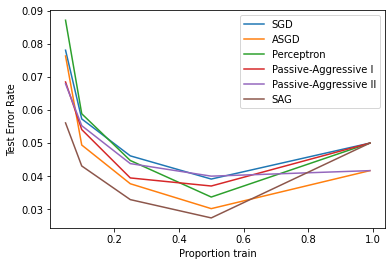

In [24]:
# Splitting the dataset into the Training set and Test set to study the solvers 
from sklearn.model_selection import train_test_split
heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, Y1, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

In [25]:
# Splitting the dataset into the Training set and Test set to return ROC and confusion matrices
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size = 0.25, random_state = 0)

In [26]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



SGDClassifier(max_iter=100)
Normalized confusion matrix
[[0.96 0.04]
 [0.04 0.96]]


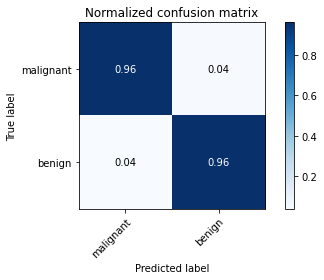

SGDClassifier(average=True)
Normalized confusion matrix
[[0.92 0.08]
 [0.06 0.94]]


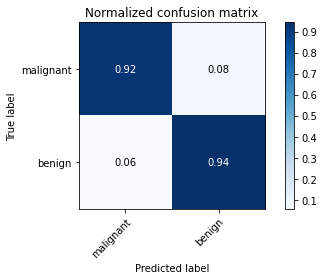

Perceptron()
Normalized confusion matrix
[[0.97 0.03]
 [0.06 0.94]]


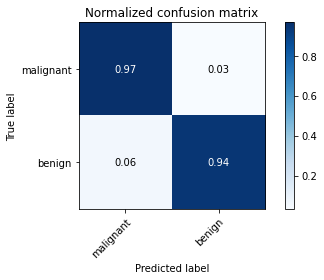

PassiveAggressiveClassifier(tol=0.0001)
Normalized confusion matrix
[[0.96 0.04]
 [0.08 0.92]]


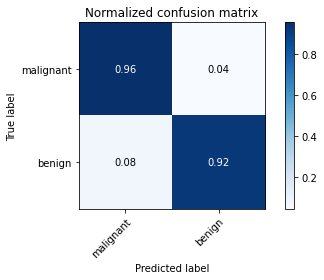

PassiveAggressiveClassifier(loss='squared_hinge', tol=0.0001)
Normalized confusion matrix
[[0.94 0.06]
 [0.08 0.92]]


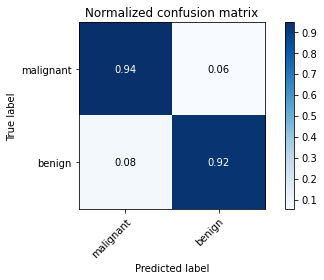

LogisticRegression(C=17.57469244288225, solver='sag', tol=0.1)
Normalized confusion matrix
[[0.97 0.03]
 [0.06 0.94]]


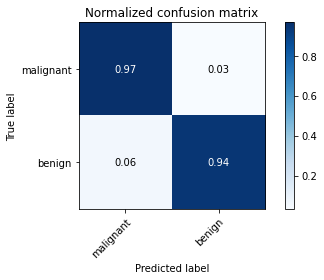

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
y_labels = np.array(['malignant', 'benign'])

#classes = Y_labels[unique_labels(Y_test, Y_pred)]

    # iterate over classifiers
lst=[]
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    lst.append(clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    np.set_printoptions(precision=2)
    print(clf)
    # Plot normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=y_labels, normalize=True,title='Normalized confusion matrix')
    # Plot non-normalized confusion matrix
    #plot_confusion_matrix(Y_test, Y_pred, classes=Y,title='Confusion matrix, without normalization')
    plt.show()

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')


In [28]:
#errors
print(lst)

[0.958041958041958, 0.9300699300699301, 0.958041958041958, 0.9440559440559441, 0.9370629370629371, 0.958041958041958]


## Respuesta

<span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

In [33]:
classifiers = [
    ("SGD", SGDClassifier(max_iter=100, tol=1e-3)),# SGDClassifier (soft-margin) linear Support Vector Machine,
    ("ASGD", SGDClassifier(average=True, max_iter=1000, tol=1e-3)),# SGDClassifier (soft-margin) linear Support Vector Machine with averaged weights,
    ("Perceptron", Perceptron(tol=1e-3)),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0, tol=1e-4)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0],
                               multi_class='auto'))
]

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

sgd = SGDClassifier(max_iter=100, tol=1e-3)
sgd.fit(X_train, y_train)
Y_sgd_score = sgd.decision_function(X_test)

asgd = SGDClassifier(average=True, max_iter=1000, tol=1e-3)
asgd.fit(X_train, y_train)
Y_asgd_score = asgd.decision_function(X_test)

pa1=PassiveAggressiveClassifier(loss='hinge', C=1.0, tol=1e-4)
pa1.fit(X_train, y_train)
Y_pa1_score = pa1.decision_function(X_test)


pa2=PassiveAggressiveClassifier(loss='squared_hinge',C=1.0, tol=1e-4)
pa2.fit(X_train, y_train)
Y_pa2_score = pa2.decision_function(X_test)

logreg=LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0], multi_class='auto')
logreg.fit(X_train, y_train)
Y_logreg_score=logreg.decision_function(X_test)

pe=Perceptron(tol=1e-3)
pe.fit(X_train, y_train)
Y_pe_score=pe.decision_function(X_test)


fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, Y_sgd_score)
fpr_asgd, tpr_asgd, thresholds_asgd = roc_curve(y_test, Y_asgd_score)
fpr_pa1, tpr_pa1, thresholds_pa1 = roc_curve(y_test, Y_pa1_score)
fpr_pa2, tpr_pa2, thresholds_pa2 = roc_curve(y_test, Y_pa2_score)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, Y_logreg_score)
fpr_pe, tpr_pe, thresholds_pe = roc_curve(y_test, Y_pe_score)


print('El score para SGD es: ', roc_auc_score(y_test, Y_sgd_score))
print('El score para ASGD es: ', roc_auc_score(y_test, Y_asgd_score))
print('El score para Passive Agressive I es: ', roc_auc_score(y_test, Y_pa1_score))
print('El score para Passive Agressive II es: ', roc_auc_score(y_test, Y_pa2_score))
print('El score para regresión logística es: ', roc_auc_score(y_test, Y_logreg_score))
print('El score para Perceptron es: ', roc_auc_score(y_test, Y_pe_score))

El score para SGD es:  0.960167714884696
El score para ASGD es:  0.9851153039832284
El score para Passive Agressive I es:  0.9616352201257861
El score para Passive Agressive II es:  0.9823899371069182
El score para regresión logística es:  0.9972746331236897
El score para Perceptron es:  0.9838574423480084


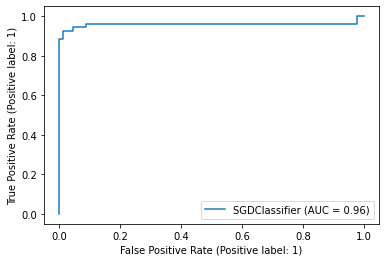

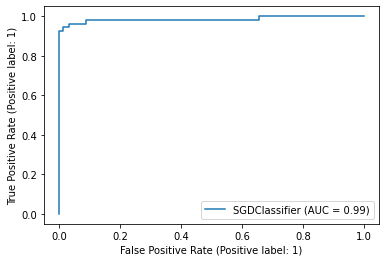

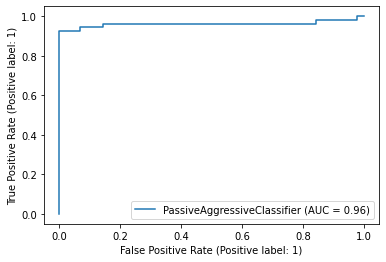

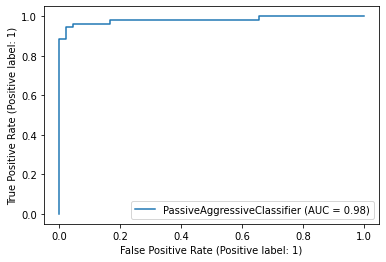

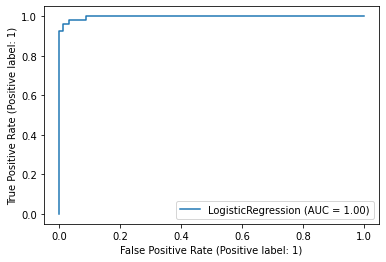

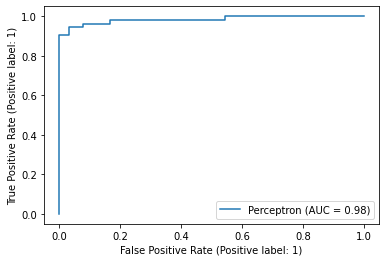

In [34]:
from sklearn import metrics
classifiers = [sgd,asgd,pa1,pa2,logreg, pe]

#plt.subplots(7,1,figsize=(7,49))
for clasifier in classifiers:
#    plt.subplot(7,1,classifiers.index(clasifier)+1)
    metrics.plot_roc_curve(clasifier, X_test, y_test)

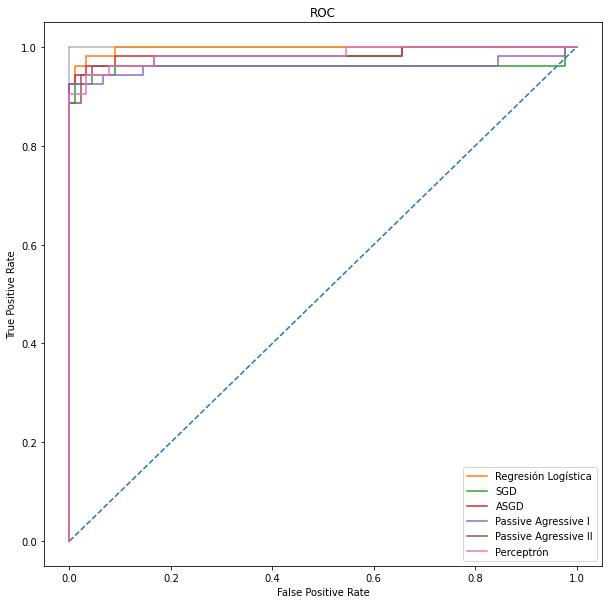

In [37]:
fig = plt.figure(figsize=(10,10))
plt.title('ROC')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot(fpr_logreg, tpr_logreg,label='Regresión Logística')
plt.plot(fpr_sgd, tpr_sgd,label='SGD')
plt.plot(fpr_asgd, tpr_asgd,label='ASGD')
plt.plot(fpr_pa1, tpr_pa1,label='Passive Agressive I')
plt.plot(fpr_pa2, tpr_pa2,label='Passive Agressive II')
plt.plot(fpr_pe, tpr_pe,label='Perceptrón')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Ejercicio 2: 

Estudie el espacio de parámetros de los kernel SVM, usando RBF, sigmoid y polinomial kernels con los datos de cancer de mama. Use el siguiente codigo como ejemplo (corresponde a RBF SVM).

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


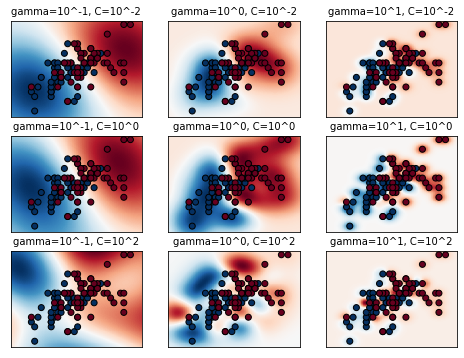

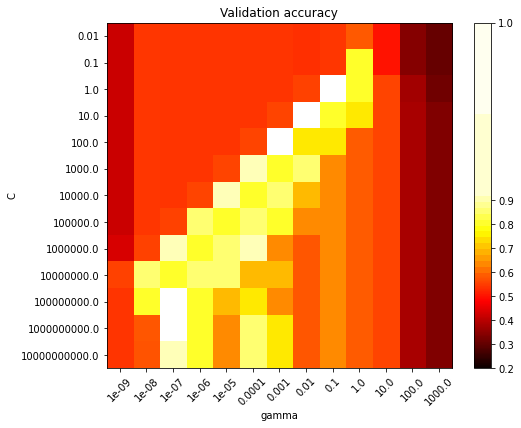

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv) #EL KERNEL POR DEFAULT DE SVC ES RBF, ASI QUE ACA HAY QUE ESPECIFICAR QUE KERNEL QUEREMOS
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

## Respuesta 

<span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

### Usando RBF como kernel 

The best parameters are {'C': 10.0, 'gamma': 0.01} with a score of 0.98


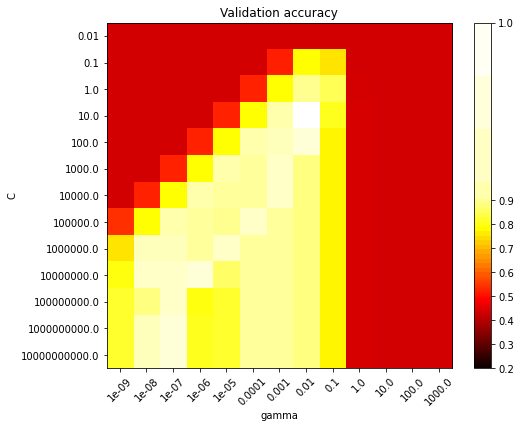

In [45]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

#X_2d = X[:, :2]    
#X_2d = X_2d[y > 0]
#y_2d = y[y > 0]      EL DATASET DE CANCER YA ES UN PROBLEMA DE CLASIFICACION BINARIO
#y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
#X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv) #EL KERNEL POR DEFAULT DE SVC ES RBF, ASI QUE ACA HAY QUE ESPECIFICAR QUE KERNEL QUEREMOS
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

#plt.figure(figsize=(8, 6))
#xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))          TODO ESTO QUEDA COMENTADO PORQUE NO PUEDO GRAFICAR LA FUNCION
#for (k, (C, gamma, clf)) in enumerate(classifiers):                             DE DESICION SI MI ESPACIO DE FEATURES ES DE 31 VARIABLES
#    # evaluate decision function in a grid                                      ESTE CODIGO ES PARA HACER UN GRAFICO 2D Y SIRVE SOLO SI  
#    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])                    CONSIDERO DOS FEATURES EN EL DATASET DE CANCER   
#    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
#    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
#    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
#              size='medium')

    # visualize parameter's effect on decision function
#    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
#    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r,
#                edgecolors='k')
#    plt.xticks(())
#    plt.yticks(())
#    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

### Usando sigmoid como kernel

The best parameters are {'C': 100.0, 'gamma': 0.001} with a score of 0.98


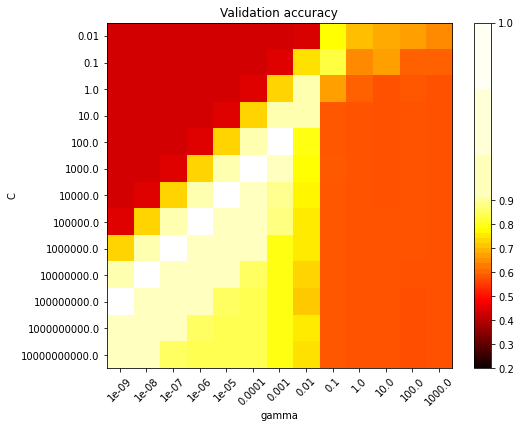

In [46]:
X = cancer.data
y = cancer.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
#X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='sigmoid'), param_grid=param_grid, cv=cv) #EL KERNEL POR DEFAULT DE SVC ES RBF, ASI QUE ACA HAY QUE ESPECIFICAR 
grid.fit(X, y)                                                       #QUE KERNEL QUEREMOS

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

### Usando polynomial como kernel

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.96


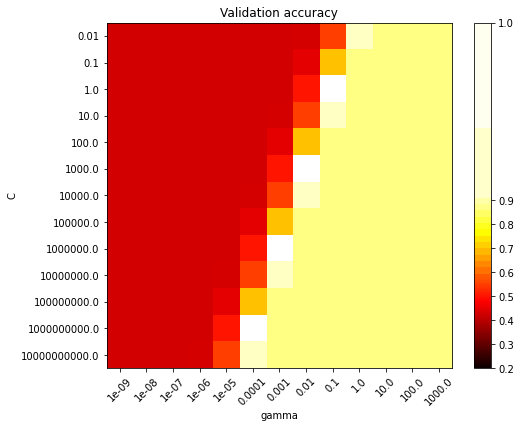

In [47]:
X = cancer.data
y = cancer.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
#X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv) #EL KERNEL POR DEFAULT DE SVC ES RBF, ASI QUE ACA HAY QUE ESPECIFICAR 
grid.fit(X, y)                                                       #QUE KERNEL QUEREMOS

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

Tenemos entonces que los mejores parámetro para cada kernel son: 
1. RBF: C=10, gamma=0.01
2. Sigmoid: C=100, gamma=0.001
3. Polynomial: C=1, gamma=0.1

# Ejercicio 3: 

Compare diferentes  SVM sobre los datos de cancer de mama. Use los parámetros que estudio en el ejemplo anterior. 

In [48]:
df = pd.read_csv('data_breast_cancer.csv')
dataset = df.drop(['Unnamed: 32'], axis=1)
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

dataframe = pd.DataFrame(Y)
#Encoding categorical data values 
labelencoder_Y = LabelEncoder()
Y1 = labelencoder_Y.fit_transform(Y)

#Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size = 0.25, random_state = 0)

classifiers = [("SVC_RBF", SVC(C=10., kernel='rbf', gamma=0.01)),
    ("SVC_sigmoid", SVC(C=100, kernel='sigmoid', gamma=0.001)),
    ("SVC_poly", SVC(C=1.0, kernel='poly', gamma=0.1))]


SVC_RBF = SVC(C=10., kernel='rbf', gamma=0.01)
SVC_RBF.fit(X_train, y_train)
Y_SVC_RBF_score = SVC_RBF.decision_function(X_test)

SVC_sigmoid = SVC(C=100, kernel='sigmoid', gamma=0.001)
SVC_sigmoid.fit(X_train, y_train)
Y_SVC_sigmoid_score = SVC_sigmoid.decision_function(X_test)

SVC_poly=SVC(C=1.0, kernel='poly', gamma=0.1)
SVC_poly.fit(X_train, y_train)
Y_SVC_poly_score = SVC_poly.decision_function(X_test)


fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test, Y_SVC_RBF_score)
fpr_sigmoid, tpr_sigmoid, thresholds_sigmoid = roc_curve(y_test, Y_SVC_sigmoid_score)
fpr_poly, tpr_poly, thresholds_poly = roc_curve(y_test, Y_SVC_poly_score)


print('El score para kernel RBF es: ', roc_auc_score(y_test, Y_SVC_RBF_score))
print('El score para kernel sigmoid es: ', roc_auc_score(y_test, Y_SVC_sigmoid_score))
print('El score para kernel polinomial es: ', roc_auc_score(y_test, Y_SVC_poly_score))

El score para kernel RBF es:  0.9987421383647799
El score para kernel sigmoid es:  0.9966457023060797
El score para kernel polinomial es:  0.9987421383647799


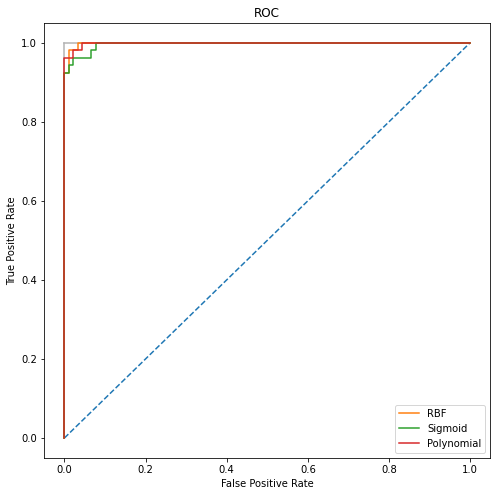

In [50]:
fig = plt.figure(figsize=(8,8))
plt.title('ROC')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot(fpr_rbf, tpr_rbf,label='RBF')
plt.plot(fpr_sigmoid, tpr_sigmoid,label='Sigmoid')
plt.plot(fpr_poly, tpr_poly,label='Polynomial')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Ejercicio 4: 

Compare diferentes  SVM sobre los datos de Digits. Estudie las estrategias para hacer una clasificacion con multiples clases y optimice el parametro $C$. Puede usar el codigo siguiente como guia.
En este código, se usa el default (cual es? ) para computar clasificacion multi clase. Cambie ese parametro para clasificacion one vs rest o multiclass, compute los scores, y diga cual estrategia es la mejor. 

In [51]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.028) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 

Probamos con otros parametros: elegimos kernels sigmoid y precomputed, y vario entre varios valores de C y gamma. Observemos que el kernel por default es RBF (lo comente en los codigos proporcionados antes)

In [55]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(decision_function_shape='ovo'), tuned_parameters, scoring='%s_macro' % score
    )                           ### ovo o ovr
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.028) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o

In [56]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(decision_function_shape='ovr'), tuned_parameters, scoring='%s_macro' % score
    )                           ### ovo o ovr
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.028) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o